In [44]:
import os
import regex as re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [45]:
rec_filepath = os.getcwd() + '\\data\\recipes.csv'


In [46]:
df_rec= pd.read_csv(rec_filepath, sep=';', error_bad_lines=False, warn_bad_lines=False, encoding= 'unicode_escape')


In [48]:
#df_merge = df_rec.merge(df_rev,on='RecipeID')

In [49]:
df_rec['flag_num'] = df_rec['RecipeID'].apply(lambda x: 1 if str(x).isnumeric() else 0)
df_rec['Review Count'] = df_rec['Review Count'].apply(lambda x: str(x)[:-1]+'000' if str(x)[-1]=='k' else x)

In [50]:
df_rec = df_rec[~df_rec['Ingredients'].isna()]
df_rec = df_rec[df_rec['flag_num']==1]
df_rec['RecipeID'] = df_rec['RecipeID'].astype(int)
df_rec['ReviewCount'] = df_rec['Review Count'].astype(int)

In [51]:
df_rec['Cook Time'] = df_rec['Cook Time'].apply(lambda x: np.NaN if str(x)=='X' else x)

df_rec['Cook Time1'] = df_rec['Cook Time'].apply(lambda x: '0 d '+str(x) if ('m' in str(x) and 'h' in str(x) and 'd' not in str(x)) else \
                        '0 d 0 h '+str(x) if ('m' in str(x) and 'h' not in str(x) and 'd' not in str(x)) else \
                        '0 d '+str(x)+' 0 m' if ('m' not in str(x) and 'h' in str(x) and 'd' not in str(x)) else \
                        str(x)+' 0 h 0 m' if ('m' not in str(x) and 'h' not in str(x) and 'd' in str(x)) else \
                        str(x)+' 0 m' if ('m' not in str(x) and 'h' in str(x) and 'd' in str(x)) else x
                         )

df_rec['Cook Time2'] = df_rec['Cook Time1'].fillna('empty').apply(lambda x: re.findall('[0-9]+', str(x)) if x!='empty' else x)
df_rec['CookTimeMin'] = df_rec['Cook Time2'].apply(lambda x: (int(x[0])*60*24) + (int(x[1])*60) + int(x[2]) if x!='empty' else np.NaN)

In [52]:
df_rec['Prepare Time'] = df_rec['Prepare Time'].apply(lambda x: np.NaN if str(x)=='X' else x)

df_rec['Prepare Time1'] = df_rec['Prepare Time'].apply(lambda x: '0 d '+str(x) if ('m' in str(x) and 'h' in str(x) and 'd' not in str(x)) else \
                        '0 d 0 h '+str(x) if ('m' in str(x) and 'h' not in str(x) and 'd' not in str(x)) else \
                        '0 d '+str(x)+' 0 m' if ('m' not in str(x) and 'h' in str(x) and 'd' not in str(x)) else \
                        str(x)+' 0 h 0 m' if ('m' not in str(x) and 'h' not in str(x) and 'd' in str(x)) else \
                        str(x)+' 0 m' if ('m' not in str(x) and 'h' in str(x) and 'd' in str(x)) else x
                         )

df_rec['Prepare Time2'] = df_rec['Prepare Time1'].fillna('empty').apply(lambda x: re.findall('[0-9]+', str(x)) if x!='empty' else x)
df_rec['PrepTimeMin'] = df_rec['Prepare Time2'].apply(lambda x: (int(x[0])*60*24) + (int(x[1])*60) + int(x[2]) if x!='empty' else np.NaN)

In [53]:
df_rec['CookTimeMin'].fillna(df_rec['CookTimeMin'].median(), inplace=True)   
df_rec['PrepTimeMin'].fillna(df_rec['PrepTimeMin'].median(), inplace=True) 

df_rec['PrepTimeMin'] = df_rec['PrepTimeMin'].astype(int)
df_rec['CookTimeMin'] = df_rec['CookTimeMin'].astype(int)

In [54]:
df_rec['RecipeName'] = df_rec['Recipe Name'].apply(lambda x: re.sub('''[^aA-zZ0-9 ]''','',x).strip().lower())

In [55]:
df_rec['Ingredients'] = df_rec['Ingredients'].apply(lambda x: re.sub('\*\*','. ',x).strip().lower())
df_rec['Ingredients'] = df_rec['Ingredients'].apply(lambda x: re.sub('''\s*\([aA-zZ0-9\. ]+\)\s*''',' ',x).strip())
df_rec['Ingredients'] = df_rec['Ingredients'].apply(lambda x:  re.sub('''\s*\(.+\)\s*''',' ',x).strip())

df_rec['Ingredients'] = df_rec['Ingredients'].apply(lambda x: re.sub('''[\']''','',x).strip())

In [56]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

df_rec['Ingredients'] = df_rec['Ingredients'].apply(lambda x: lemmatizer.lemmatize(x))

In [47]:
x = df_rec.iloc[0,8]

In [27]:
df_rec.iloc[0,8]

'2 packages active dry yeast. 3/4 cup warm water . 1/2 cup white sugar. 1 teaspoon salt. 2 eggs. 1/2 cup butter, room temperature. 4 cups all-purpose flour. 1/4 cup butter, softened'

In [57]:
print('BEFORE:-')
print(x)
print()
print('After:-')
print(df_rec.iloc[0,8])

BEFORE:-
2 (.25 ounce) packages active dry yeast**3/4 cup warm water (110 degrees F/45 degrees C)**1/2 cup white sugar**1 teaspoon salt**2 eggs**1/2 cup butter, room temperature**4 cups all-purpose flour**1/4 cup butter, softened

After:-
2 packages active dry yeast. 3/4 cup warm water . 1/2 cup white sugar. 1 teaspoon salt. 2 eggs. 1/2 cup butter, room temperature. 4 cups all-purpose flour. 1/4 cup butter, softened


In [117]:
del df_rec['Recipe Photo']
del df_rec['Author']
del df_rec['Total Time']
del df_rec['flag_num']
del df_rec['Prepare Time']
del df_rec['Prepare Time1']
del df_rec['Prepare Time2']
del df_rec['Cook Time']
del df_rec['Cook Time1']
del df_rec['Cook Time2']
del df_rec['Directions']
del df_rec['Recipe Name']
del df_rec['Review Count']

In [155]:
df_rec

,RecipeID,Ingredients,ReviewCount,CookTimeMin,PrepTimeMin,RecipeName
0,7000,2 packages active dry yeast. 3/4 cup warm wate...,304,15,25,golden crescent rolls recipe
1,7001,3 cups all-purpose flour. 1 1/2 teaspoons salt...,137,60,15,poppy seed bread with glaze recipe
2,7003,3 cups all-purpose flour. 3 eggs. 2 cups white...,124,80,10,applesauce bread i recipe
3,7006,1 1/2 cups all-purpose flour. 2 teaspoons baki...,39,60,15,apple raisin bread recipe
4,7007,1 cup rolled oats. 1 cup buttermilk. 1/2 cup v...,41,60,10,buttermilk oatmeal bread recipe
...,...,...,...,...,...,...
13401,27456,1 package confectioners sugar. 3 tablespoons b...,5,30,30,hot coffee frosting recipe
13402,27478,crust:. 2 cups crushed graham crackers. 1 cup ...,78,60,20,white chocolate blueberry cheesecake recipe
13403,27491,2 cups all-purpose flour. 3/4 cup white sugar....,704,25,20,aunt annes coffee cake recipe
13404,27511,1 package devils food cake mix. 1 package inst...,157,50,25,giant ding dong cake recipe


In [156]:
df_rec.to_csv('new_recipes.csv', index=False)

In [27]:
target = int(du.shape[0]*0.1)
new_df = du.copy()
for col in du.columns:
    if col not in ['Ingredients', 'ReviewCount', 'CookTimeMin', 'PrepTimeMin','RecipeName', 'RecipeID']:
        if desc.loc['count', col]  < target:
            del new_df[col]

In [41]:
new_df

,water,white sugar,salt,eggs,butter,allpurpose flour,baking powder,vegetable oil,milk,vanilla extract,cinnamon,baking soda,cream,Unnamed: 66,black pepper
0,0.75,0.500000,1.0,2.0,0.25,2.00,0.00,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0
1,0.00,1.000000,0.5,3.0,0.00,2.00,1.50,1.333333,1.50,1.0,0.0,0.00,0.0,0.0,0.0
2,0.00,1.000000,0.0,3.0,0.00,2.00,0.25,1.000000,0.00,0.0,1.0,1.00,0.5,0.0,0.0
3,0.00,0.000000,1.0,2.0,0.00,1.50,2.00,0.250000,0.25,0.0,1.0,0.25,0.0,0.0,0.0
4,0.00,0.000000,0.5,0.0,0.00,1.00,1.00,0.500000,0.00,0.0,0.0,0.50,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12346,0.00,0.000000,0.0,0.0,0.75,0.00,0.00,0.000000,0.00,1.0,0.0,0.00,0.0,0.0,0.0
12347,0.25,0.500000,0.0,4.0,0.00,1.00,0.00,0.000000,0.00,1.0,0.0,0.00,1.0,0.0,0.0
12348,0.00,0.666667,0.5,0.0,0.25,0.25,2.00,0.000000,0.75,1.0,1.0,0.00,0.0,0.0,0.0
12349,1.00,1.000000,0.0,4.0,0.50,0.25,0.00,0.500000,1.00,1.0,0.0,0.00,0.0,0.0,0.0


In [29]:
for col in new_df.columns:
    if col not in ['Ingredients', 'ReviewCount', 'CookTimeMin', 'PrepTimeMin','RecipeName', 'RecipeID']:
        qq = new_df[col].quantile(0.75)
        med = new_df[col].quantile(0.50)
        new_df[col] = new_df[col].apply(lambda x : med if x>qq else x)

In [40]:
new_df = new_dfs.set_index('RecipeID').iloc[:,5:].fillna(0.0)

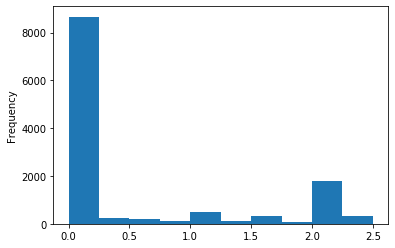

In [32]:
new_df['allpurpose flour'].plot.hist()

In [42]:


scaler = StandardScaler()
fit = scaler.fit(new_df)

new_df_scaled = scaler.transform(new_df)



In [43]:
new_df_scaled

array([[ 1.17284885,  0.39080043,  2.43944808, ..., -0.33362454,
        -0.56947452, -0.25286132],
       [-0.42602172,  1.45906516,  0.93007395, ..., -0.33362454,
        -0.56947452, -0.25286132],
       [-0.42602172,  1.45906516, -0.57930018, ...,  1.38120674,
        -0.56947452, -0.25286132],
       ...,
       [-0.42602172,  0.74688867,  0.93007395, ..., -0.33362454,
        -0.56947452, -0.25286132],
       [ 1.7058057 ,  1.45906516, -0.57930018, ..., -0.33362454,
        -0.56947452, -0.25286132],
       [-0.42602172,  1.45906516, -0.57930018, ..., -0.33362454,
         2.81863772, -0.25286132]])

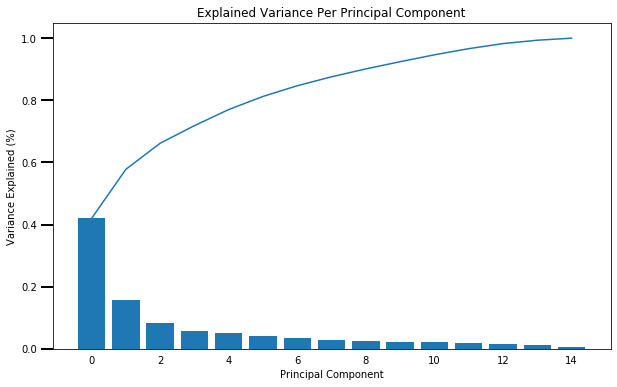

In [45]:
# Investigate the variance accounted for by each principal component.
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components             
    '''
    num_components = len(pca.explained_variance_ratio_) ## num of Principal components (PCs)
    ind = np.arange(num_components) # create an index list
    vals = pca.explained_variance_ratio_ # show the % of vaition explained by each PC
    cumvals = np.cumsum(vals) # cummulative sum to see the % of vaiation explained by PC1+PC2+PC3+....+PCn

    ## plotting
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    ax.bar(ind, vals) # create bar plot to show %var explained by each PC
    ax.plot(ind, cumvals) # create line plot to show % increase in exp variance for every added PC
 
    ## set plot lables
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
    return {i:v for i,v in zip(ind,cumvals) if v<=99}
    
# Apply PCA to the data.
pca = PCA(n_components=15, random_state=45)
X_pca = pca.fit_transform(new_df) ## fit it to the data to generate the PCs

plot = scree_plot(pca) # call the function above


In [48]:
from sklearn.manifold import MDS, Isomap, TSNE
embedding = TSNE(n_components=2, n_jobs=-1)
X_transformed = embedding.fit_transform(new_df)
X_transformed.shape

(12351, 2)

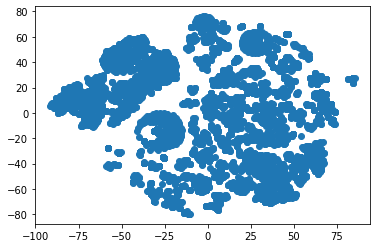

In [49]:
plt.scatter(X_transformed[:,0],X_transformed[:,1])

In [78]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

IF = IsolationForest(random_state=0,contamination=0.01)
EE = EllipticEnvelope(support_fraction=1, contamination=0.01)
SVM = OneClassSVM(nu=0.2, gamma='auto')

In [79]:
labels = EE.fit_predict(X_transformed)
labels

array([1, 1, 1, ..., 1, 1, 1])

In [53]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=4, min_samples=2).fit(X_transformed)
clustering.labels_

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

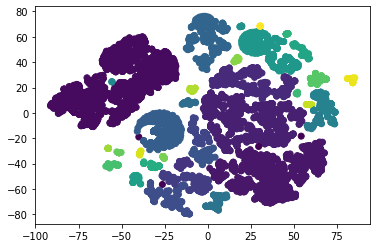

In [54]:
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=clustering.labels_)

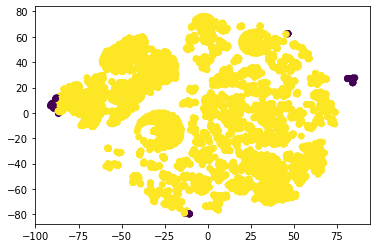

In [80]:
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=labels)

In [56]:
c_labels = clustering.labels_
cc = np.unique(clustering.labels_, return_counts=True)
for i,c in enumerate(cc[1]):
    if c> 100:
        c_labels[c_labels==cc[0][i]] = 0
    else:
        c_labels[c_labels==cc[0][i]] = 1
    

In [57]:
np.unique(c_labels, return_counts=True)

(array([0, 1], dtype=int64), array([11655,   696], dtype=int64))

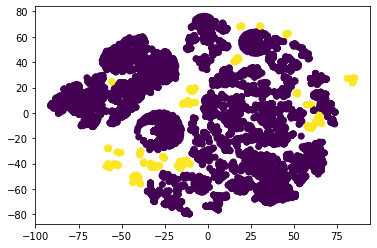

In [58]:
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=c_labels)

In [19]:
pca = PCA(n_components=200, random_state=45)
pca_fit = pca.fit(new_df) # X_train_final

X_train_pca = pca_fit.transform(new_df)


In [27]:
X_train_pca[:,0:2].shape

(12351, 2)

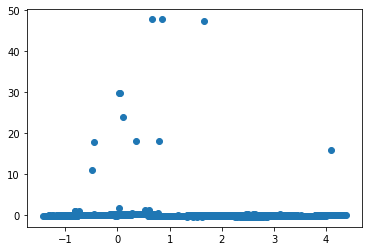

In [30]:
import seaborn as sns
plt.scatter(X_train_pca[:,0],X_train_pca[:,1])

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [50]:
A = cosine_similarity(new_df)

In [40]:
A = A-np.identity(A.shape[0])

In [51]:
np.argmin(A[0])

64

In [52]:
A[0,64]

0.0

In [47]:
du.iloc[0,:]

Ingredients                2 packages active dry yeast. 3/4 cup warm wate...
ReviewCount                                                              304
CookTimeMin                                                               15
PrepTimeMin                                                               25
RecipeName                                      golden crescent rolls recipe
                                                 ...                        
pizza crust bread shell                                                  NaN
buitoni pesto basil                                                      NaN
brown sugar replacement                                                  NaN
splenda granular                                                         NaN
treacle                                                                  NaN
Name: 0, Length: 3759, dtype: object

In [53]:
du.iloc[64,:]

Ingredients                1 pound frozen bread dough, thawed
ReviewCount                                                 8
CookTimeMin                                                20
PrepTimeMin                                                10
RecipeName                              bread bowls ii recipe
                                          ...                
pizza crust bread shell                                   NaN
buitoni pesto basil                                       NaN
brown sugar replacement                                   NaN
splenda granular                                          NaN
treacle                                                   NaN
Name: 64, Length: 3759, dtype: object

In [59]:
du['label_IF'] = labels

In [60]:
du['label_DBSCAN'] = c_labels

In [61]:
du[du['label_IF']!=1]

,RecipeID,Ingredients,ReviewCount,CookTimeMin,PrepTimeMin,RecipeName,yeast,water,white sugar,salt,...,chocolatehazelnut spread,loaf italian,cedar plank,pizza crust bread shell,buitoni pesto basil,brown sugar replacement,splenda granular,treacle,label_IF,label_DBSCAN
40,7060,1 egg. 1/4 cup apple juice. 1 tablespoon unsal...,12,15,10,golly gee gluten,NaN,NaN,NaN,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0
73,7101,1 package yellow cake mix. 4 eggs. 1/4 cup veg...,45,30,15,pistachio bread recipe,NaN,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0
97,7135,5 cups day-old bread cubes. 4 cups scalded mil...,56,30,15,bread pudding with lemon sauce i recipe,NaN,1.0,0.5,0.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0
250,7327,1 package german chocolate cake mix without pu...,27,30,15,earthquake cake i recipe,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0
348,7465,1 can cherry pie filling. 1 can crushed pineap...,140,30,15,dump cake iv recipe,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12193,26756,1/2 cup sour cream. 1/2 cup mayonnaise. 1 cup ...,72,5,15,creamy cheese bread recipe,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1
12198,26780,"1 cup butter, softened. 3 tablespoons poppy se...",306,12,15,easy ham and cheese appetizer sandwiches recipe,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0
12248,26928,"5 ounces almonds. 1/2 package cream cheese, so...",12,10,30,roquefort grapes recipe,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1
12251,26945,1 pound ground italian sausage. 1/2 cup shredd...,111,10,25,sausage flowers recipe,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1


In [62]:
du[du['label_DBSCAN'] ==1]

,RecipeID,Ingredients,ReviewCount,CookTimeMin,PrepTimeMin,RecipeName,yeast,water,white sugar,salt,...,chocolatehazelnut spread,loaf italian,cedar plank,pizza crust bread shell,buitoni pesto basil,brown sugar replacement,splenda granular,treacle,label_IF,label_DBSCAN
19,7026,1 cup bread flour. 1 1/4 cups whole wheat flou...,37,180,5,honey oatmeal bread i recipe,0.25,0.50,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
68,7092,2 1/2 teaspoons active dry yeast. 1/4 cup warm...,70,180,10,homemade wonderful bread recipe,2.50,0.25,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
161,7218,1 1/2 cups whole meal rye flour. 3/4 cup filte...,5,30,15,rye starter recipe,NaN,0.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
266,7346,1 package white cake mix. 1 cup sour cream. 2 ...,121,30,30,coconut cake i recipe,NaN,NaN,2.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
308,7409,"11 ounces cream cheese, softened. 3/4 cup whit...",205,30,15,strawberry torte recipe,NaN,NaN,0.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12303,27162,"1/4 cup butter, softened. 1/3 cup brown sugar....",35,10,5,tropical baked bananas recipe,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
12308,27184,"1 granny smith apple, cored. 1 tablespoon brow...",30,10,5,apples by the fire recipe,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
12320,27202,1 loaf french bread. 2 tablespoons prepared ho...,15,20,15,the big sandwich recipe,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
12322,27209,"2 packages cream cheese, room temperature. 1/2...",125,30,10,nutella cheesecake recipe,NaN,NaN,0.50,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
